In [1]:
from SubTempNet import *
from edgelist import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Emp

In [25]:
#names=["primaryschool","hospital","highschool2012","lotr","hypertext","SFHH"]
names=["hospital","hypertext","primaryschool"]

mins=[]
means =[]
Is=[]
for name in names:
    filename = "data/"+name+".edges"
    objname= name
    STN = SubTempNet(filename, objname, directed= False, init = False)
    print(STN)
    num = 50
    T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
    I = [2** i for i in range(1,int(np.log2(STN["T"])+1))]
    i,m = STN.get_min(I,T)
    Is.append(i)
    mins.append(m)
    i,m = STN.get_mean(I,T)
    means.append(m)

filename =	data/hospital.edges
objname =	hospital_SubTempNet
directed =	False
ncount = 	75
ecount = 	32424
T = 		17376

filename =	data/hypertext.edges
objname =	hypertext_SubTempNet
directed =	False
ncount = 	113
ecount = 	20818
T = 		10618

filename =	data/primaryschool.edges
objname =	primaryschool_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846



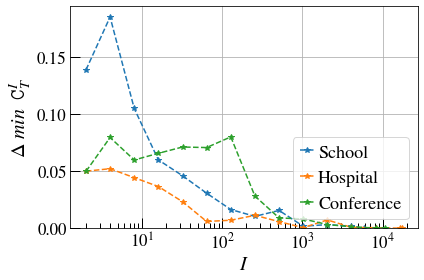

In [38]:
names=["Hospital","Conference","School"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$\Delta \ min \ \ \mathtt{C}_T^I\ $')
ax.grid()
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")

for j in range(len(names)):
    name = names[j]
    m=mins[j]
    m = [m[i+1]-m[i] for i in range(len(m)-1)]
    i=Is[j][1:]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_dmin.png", dpi=600)

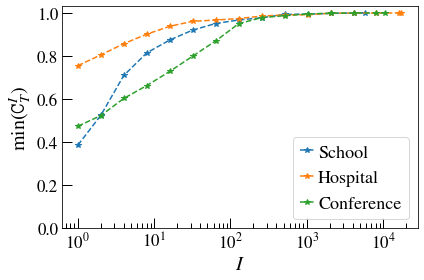

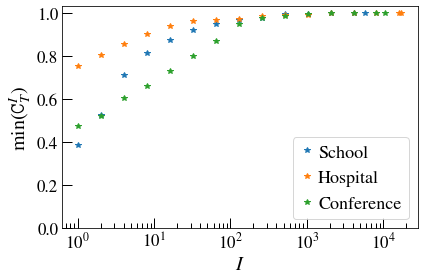

In [59]:
names=["Hospital","Conference","School"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$\min(\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")

for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_min_line.png", dpi=600)

fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")

for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_min.png", dpi=600)

# Edge Time random

In [26]:
#names=["primaryschool","hospital","highschool2012","lotr","hypertext","SFHH"]
names=["hospital","hypertext","primaryschool"]

minsR=[]
meansR =[]
IsR=[]
for name in names:
    name = name + "_ET"
    filename = "data/"+name+".edges"
    objname= name
    STN = SubTempNet(filename, objname, directed= False, init = False)
    print(STN)
    num = 50
    T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
    I = [2** i for i in range(1,int(np.log2(STN["T"])+1))]
    i,m = STN.get_min(I,T)
    IsR.append(i)
    minsR.append(m)
    i,m = STN.get_mean(I,T)
    meansR.append(m)

filename =	data/hospital_ET.edges
objname =	hospital_ET_SubTempNet
directed =	False
ncount = 	75
ecount = 	32424
T = 		17375

filename =	data/hypertext_ET.edges
objname =	hypertext_ET_SubTempNet
directed =	False
ncount = 	113
ecount = 	20818
T = 		10618

filename =	data/primaryschool_ET.edges
objname =	primaryschool_ET_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846



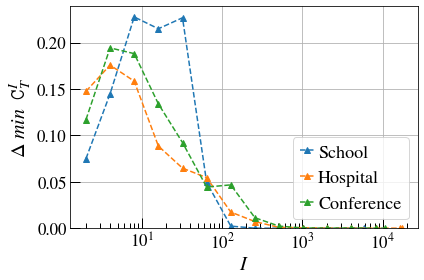

In [46]:
names=["School","Hospital","Conference"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$\Delta \ min \ \ \mathtt{C}_T^I\ $')
ax.grid()
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    m = [m[i+1]-m[i] for i in range(len(m)-1)]
    i=Is[j][1:]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_dmin.png", dpi=600)

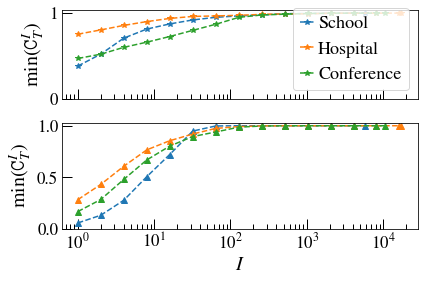

In [20]:
names=["School","Hospital","Conference"]
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 3]) 
ax = fig.add_subplot(gs[0])
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)


axin = fig.add_subplot(gs[1])
axin.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
axin.set_xscale("log")
axin.set_yscale("linear")
axin.set_xlabel(r'$I$')
for j in range(len(names)):
    name = names[j]
    m=minsR[j]
    i=IsR[j]
    axin.plot(i,m,"--^", label = name)
plt.setp(ax.get_xticklabels(), visible=False)
axin.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
axin.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
axin.set_ylim(0, ax.set_ylim()[1])
fig.subplots_adjust(hspace=.0)
fig.tight_layout()
#fig.savefig("fig/emp_ET_min.png", dpi=600)

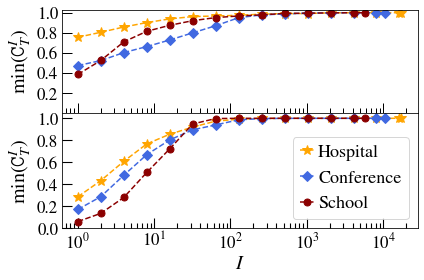

In [32]:
        names=["School","Hospital","Conference"]
        names=["Hospital","Conference","School"]
        colo = ["orange","royalblue","darkred"]
        fig = plt.figure()
        lines = ["--*","--D","--o"]
        mss = [10,7,7]
        gs = gridspec.GridSpec(2, 1, height_ratios=[2.7, 3]) 
        ax = fig.add_subplot(gs[0])
        ax.set_xscale("log")
        ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
        ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
        ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
        ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
        for j in range(len(names)):
            name = names[j]
            m=mins[j]
            i=Is[j]
            ax.plot(i,m,lines[j],ms=mss[j], color = colo[j],label = name)
        
        axin = fig.add_subplot(gs[1], sharex = ax)
        axin.set_xscale("log")
        axin.set_ylabel(r'$\min (\mathtt{C}_T^I )$')      
        axin.set_xlabel(r'$I$')
        axin.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
        
        axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
        axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')
        for j in range(len(names)):
            name = names[j]
            m=minsR[j]
            i=IsR[j]
            axin.plot(i,m,lines[j],ms=mss[j], color = colo[j], label = name)
        axin.legend(handlelength = 0.8, handletextpad=0.2, loc = "lower right")

        plt.setp(ax.get_xticklabels(), visible=False)
        ax.set_xticks([1,10,100,1000,10000])        
        axin.set_ylim(0, axin.set_ylim()[1])
        ax.set_ylim(0, ax.set_ylim()[1])
        fig.tight_layout()
        fig.subplots_adjust(hspace=.0)
        fig.savefig("fig/emp_min.png", dpi=600)

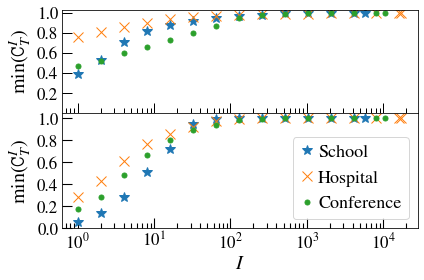

In [97]:
        names=["School","Hospital","Conference"]
        fig = plt.figure()
        lines = ["*","x","."]
        gs = gridspec.GridSpec(2, 1, height_ratios=[2.7, 3]) 
        ax = fig.add_subplot(gs[0])
        ax.set_xscale("log")
        ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
        ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
        ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
        ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
        for j in range(len(names)):
            name = names[j]
            m=mins[j]
            i=Is[j]
            ax.plot(i,m,lines[j], label = name)
        
        axin = fig.add_subplot(gs[1], sharex = ax)
        axin.set_xscale("log")
        axin.set_ylabel(r'$\min (\mathtt{C}_T^I )$')      
        axin.set_xlabel(r'$I$')
        axin.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
        
        axin.tick_params(which = 'major', axis='both', width=1.1, length = 10, labelsize=17, direction='in')
        axin.tick_params(which = 'minor', axis='both', width=1.1, length = 5, labelsize=17, direction='in')
        for j in range(len(names)):
            name = names[j]
            m=minsR[j]
            i=IsR[j]
            axin.plot(i,m,lines[j], label = name)
        axin.legend(handlelength = 0.8, handletextpad=0.2, loc = "lower right")

        plt.setp(ax.get_xticklabels(), visible=False)
        ax.set_xticks([1,10,100,1000,10000])        
        axin.set_ylim(0, axin.set_ylim()[1])
        ax.set_ylim(0, ax.set_ylim()[1])
        fig.tight_layout()
        fig.subplots_adjust(hspace=.0)
        fig.savefig("fig/emp_min_noline.png", dpi=600)

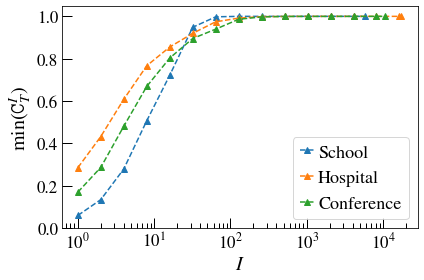

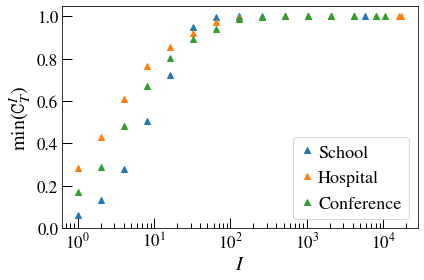

In [44]:
names=["School","Hospital","Conference"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_min_line.png", dpi=600)

fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_min.png", dpi=600)

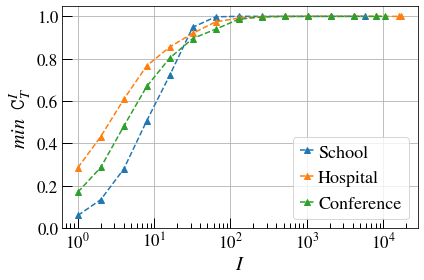

In [15]:
names=["School","Hospital","Conference"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$min \ \ \mathtt{C}_T^I\ $')
ax.grid()
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_min.png", dpi=600)

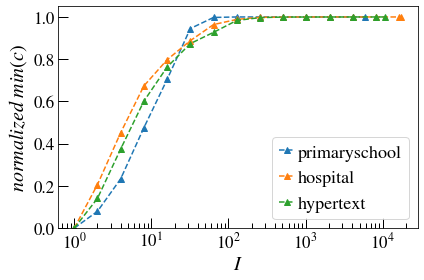

In [13]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    I=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(I,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_min_norm.png", dpi=600)

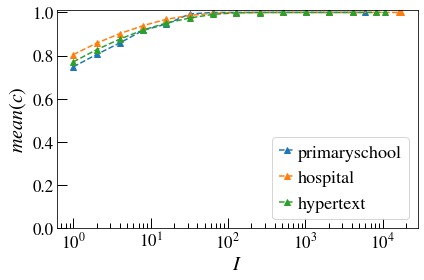

In [14]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_mean.png", dpi=600)

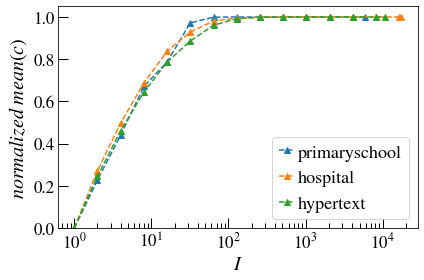

In [15]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_mean_norm.png", dpi=600)

# Snapshot time random

In [33]:
#names=["primaryschool","hospital","highschool2012","lotr","hypertext","SFHH"]
names=["primaryschool","hospital","hypertext"]

mins=[]
means =[]
Is=[]
for name in names:
    name = name + "_ST"
    filename = "data/"+name+".edges"
    objname= name
    STN = SubTempNet(filename, objname, directed= False, init = False)
    print(STN)
    num = 50
    T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
    I = [2** i for i in range(1,int(np.log2(STN["T"])+1))]
    i,m = STN.get_min(I,T)
    Is.append(i)
    mins.append(m)
    i,m = STN.get_mean(I,T)
    means.append(m)

filename =	data/primaryschool_ST.edges
objname =	primaryschool_ST_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846

filename =	data/hospital_ST.edges
objname =	hospital_ST_SubTempNet
directed =	False
ncount = 	75
ecount = 	32424
T = 		17375

filename =	data/hypertext_ST.edges
objname =	hypertext_ST_SubTempNet
directed =	False
ncount = 	113
ecount = 	20818
T = 		10611



# Random

In [16]:
names = ["ER", "SBM"]
mins=[]
means =[]
Is=[]
T=True
filepath ="data/ER/ER_ud_n100_p0001_T15000.edges"
objname = "ER_n100_p0001"
STN= SubTempNet(filepath,objname,directed= False, init = False)
I = [2** i for i in range(1,12)]
i,m = STN.get_min(I,T=False)
Is.append(i)
mins.append(m)
i,m = STN.get_mean(I,T=False)
means.append(m)



filepath ="data/SBM/SBM_ud_n50-50_p001-00005_T30000.edges"
objname = "SBM_n50-50_p001-00005"
STN= SubTempNet(filepath,objname,directed= False, init = False)
I = [2** i for i in range(1,12)]
i,m = STN.get_min(I,T = False)
Is.append(i)
mins.append(m)
i,m = STN.get_mean(I,T=False)
means.append(m)

In [17]:
mins = [([min(j,1) for j in i]) for i in mins]
print(mins)

[[0.10534693558677621, 0.21825121696674232, 0.42582162939945795, 0.6300572749655501, 0.7957627615689903, 0.893866394885574, 0.9423008658342722, 0.96537248298271, 0.9791908620147836, 0.9928659996359153, 0.9992068270213965, 1.0], [0.22390332326283988, 0.3777158604729061, 0.580987372358208, 0.761677207776997, 0.8773553336079076, 0.9319041614123582, 0.9788993211553808, 0.9996770462499812, 0.9998873180186, 1.0, 0.9997158997781832, 1]]


In [18]:
mins[1][-2]=1

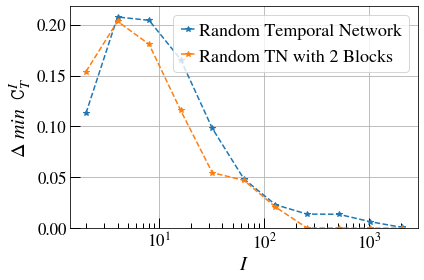

In [54]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$\Delta \ min \ \ \mathtt{C}_T^I\ $')
ax.grid()
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    m = [m[i+1]-m[i] for i in range(len(m)-1)]
    i=Is[j][1:]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="upper right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/rnd_dmin.png", dpi=600)

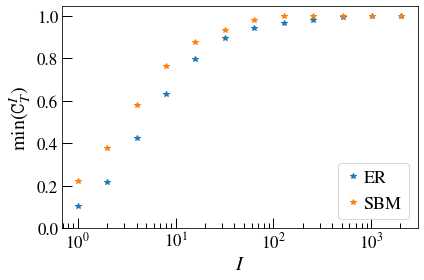

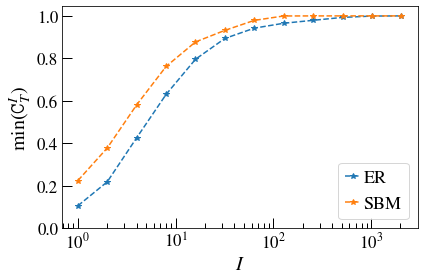

In [43]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/rnd_min.png", dpi=600)

fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/rnd_min_line.png", dpi=600)

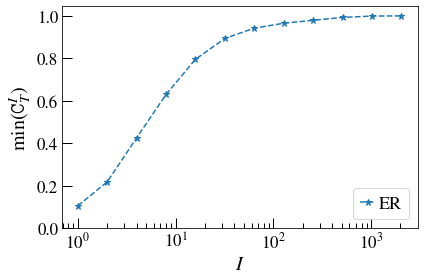

In [19]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)-1):
    name = names[j]
    mER=mins[j]
    iER=Is[j]
    ax.plot(iER,mER,"--*", label = "ER")
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()

[1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 16, 20, 24, 29, 35, 42, 51, 62, 75, 91, 109, 132, 159, 193, 232, 281, 339, 409, 494, 596, 719, 868, 1048, 1264, 1526, 1842, 2222, 2682, 3237, 3906, 4714, 5689, 6866, 8286, 10000]
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


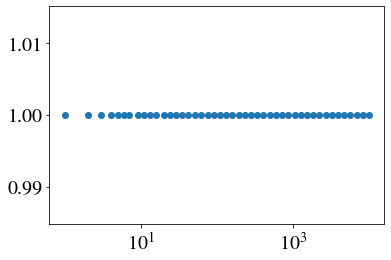

In [46]:
num = 50
T = sorted(list(set(np.logspace(np.log10(10000),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")
I = [2** i for i in range(1,int(np.log2(10000)+1))]
print(I)

In [20]:
Results = SubTempNet.load_obj("SF_Results")

In [21]:
m = {}
I = [2** i for i in range(1,int(np.log2(10000)+1))]
s=100**2
colrange = [1,2,3,4,5]
colo = plt.cm.get_cmap('viridis', len(colrange)+1).colors
for g in [1.5,2,2.5,3]:
        m[g]=[]
        PA0 =  {t:np.mean(y) for t,y in Results[g]["PA0"].items()}
        
        PAlist = ["PAT"]+ ["PAT"+str(i) for i in I]
        for PA in PAlist:
            x = list([key for key,val in Results[g][PA].items()])
            PAT = list([PA0[t]/np.mean(Results[g][PA][t]) for t in x])
            x,PAT= zip(*sorted(zip(*(x,PAT))))
            m[g].append(min(PAT)) 

In [22]:
m[1.5][-1]=1
m[2][-1]=1
m[2.5][-1]=1
m[3][-1]=1


In [23]:
m

{1.5: [0.7483430182762119,
  0.8104357380862343,
  0.8732076464753473,
  0.9237018695242707,
  0.9633124738129671,
  0.9843978045784538,
  0.9925237657942624,
  0.997525680900259,
  0.9993485565602263,
  0.999816800944789,
  0.9999955350531812,
  0.999998181656184,
  1.0,
  1],
 2: [0.5496288269855905,
  0.6772253466616358,
  0.7876543209876542,
  0.8725662149903836,
  0.9264642374984845,
  0.9589919241686914,
  0.9760687538930972,
  0.9882265435429191,
  0.9957769374151032,
  0.9985761903482651,
  0.9999219496965794,
  0.9999984126404615,
  1.0,
  1],
 2.5: [0.32703109272715253,
  0.486103630674355,
  0.6569533611358391,
  0.7997354472256519,
  0.8895159644570799,
  0.9397324723737104,
  0.9684045262380641,
  0.9813621845337173,
  0.9905391794802929,
  0.9956689318673482,
  0.9994964074482114,
  0.9999959987302638,
  1.0,
  1],
 3: [0.24376566567220107,
  0.3933923676374831,
  0.5891886257532862,
  0.7555581671781716,
  0.8629885226750612,
  0.9285519156125248,
  0.9633317464449134,
 

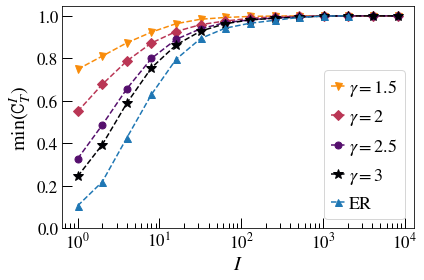

In [24]:
lines = ["--d","--o","--P","--*","--^"]
lines = ["--P","--d","--o","--*","--s"]
lines = ["--v","--D","--o","--*","--^"]
mss=[7,7,7,10,7]
fig, ax = plt.subplots()
ax.set_ylabel(r'$\min (\mathtt{C}_T^I )$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
#ax.grid()
gamma  = [1.5,2,2.5,3]
colrange = [1,1.5,2,2.5,3]
colo = plt.cm.get_cmap('inferno_r', len(colrange)).colors
#lines = ["--*","--x","--+","--.","--^"]
for i in range(len(gamma)):
    g=gamma[i]
    ax.plot([1]+I,m[g],lines[i],ms=mss[i],color = colo[i+1], label = '$\gamma=$'+str(g))
ax.plot(iER,mER,lines[-1],ms=mss[-1], label = "ER")
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/SF_min.png", dpi=600)